<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#From-main-notes" data-toc-modified-id="From-main-notes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>From main notes</a></span></li><li><span><a href="#Aim-and-objectives" data-toc-modified-id="Aim-and-objectives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Aim and objectives</a></span></li><li><span><a href="#Scope" data-toc-modified-id="Scope-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scope</a></span></li></ul></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span><ul class="toc-item"><li><span><a href="#Data-representation" data-toc-modified-id="Data-representation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data representation</a></span></li><li><span><a href="#Implementation-of-the-Delta-rule" data-toc-modified-id="Implementation-of-the-Delta-rule-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Implementation of the Delta rule</a></span></li><li><span><a href="#Implementation-of-a-two-layer-perceptron" data-toc-modified-id="Implementation-of-a-two-layer-perceptron-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Implementation of a <em>two-layer perceptron</em></a></span><ul class="toc-item"><li><span><a href="#The-forward-pass" data-toc-modified-id="The-forward-pass-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>The forward pass</a></span></li><li><span><a href="#The-backward-pass" data-toc-modified-id="The-backward-pass-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>The backward pass</a></span></li></ul></li><li><span><a href="#Weight-update" data-toc-modified-id="Weight-update-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Weight update</a></span></li></ul></li><li><span><a href="#Classification-with-a-single-layer-perceptron" data-toc-modified-id="Classification-with-a-single-layer-perceptron-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification with a single-layer perceptron</a></span><ul class="toc-item"><li><span><a href="#Generate-linearly-seperable-data" data-toc-modified-id="Generate-linearly-seperable-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Generate linearly seperable data</a></span></li><li><span><a href="#Perform-classification-with-a-single-layer-perceptron-and-analyze-the-results" data-toc-modified-id="Perform-classification-with-a-single-layer-perceptron-and-analyze-the-results-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Perform classification with a single-layer perceptron and analyze the results</a></span></li></ul></li><li><span><a href="#Questions-so-far" data-toc-modified-id="Questions-so-far-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Questions so far</a></span></li></ul></div>

In [1]:
%matplotlib inline
import sys
import numpy as np
#import pandas as pd #Builds upon numpy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from mpl_toolkits.mplot3d import axes3d
from pdb import set_trace as bp
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

sns.set()

# Introduction
## From main notes
Currently the sign-up is located at [Google Docs](https://docs.google.com/spreadsheets/d/1Jo0RsIsBoNtUF-4D9l6BAGgo9k-Jo5oi-O4r0snV8S8/edit?usp=sharing).
* Each time epoch is 15-min long
* You are in charge of the lab review, but the TA may control who talks (each participant must have knowledge of all parts of the review) and ask for extra clarification if necessary.
* Please avoid relying on your PC, laptop in the review process unless you want to show a presentation/slides or report.

Please ensure that in your presentation of the lab assignment you

* focus on main points, findings
* explain briefly what the lab is about and what the main points/questions are
* discuss prior assumptions and constraints, if any
* demonstrate key findings/results in terms of calculations, figures, tables etc.
* formulate precise conclusions based on these main points
* critically reflect on your work, mention any remaining open questions, discuss what you have learnt.

The report should be submitted for every lab assignment (as a pdf file), one per group. To this end, please form your groups in Canvas and name them by concatenating surnames of three group members, i.e. surname1_surname2_surname3. This short report should include

* clear header with the lab title, list of authors
* aim/scope of the lab assignment
* assumptions, tools used
* main results/findings supported with figures or tables along with short commentary (please do not attach the code)
* reflections, open questions and conclusions.

## Aim and objectives
After completion of the lab assignment, you should be able to
* design and apply networks in classification, function approximation and
generalisation tasks
* identify key limitations of single-layer networks
* configure and monitor the behaviour of learning algorithms for single- and multi-layer perceptrons networks
* recognise risks associated with backpropagation and minimise them for robust learning of multi-layer perceptrons.

## Scope
* Implement single- and multi-layer perceptrons with associated learning algorithms.
* Study their properties by simulation
    * How to plot? 
    
# Background
## Data representation
* Represent in matrices
* Input patterns (vectors) and associated output patterns (labels, scalar values for regression and classification)
* Training
    * Sequential (sample-by-sample)
    * Batch (this lab), all patterns in training set will be stepped through as a whole at the same time
        * Each use of the whole set of available training patterns if commonly referred to as an epoch
* Sometimes $[0,1]$ is better expressed as $[-1,1]$ and vice versa (0/1 visualized)

## Implementation of the Delta rule

In [2]:
pattern = np.array([]) #X
targets = np.array([]) #T
eta = 0.001 #See lab notes
alpha = 0.1 # Momentum...

The Delta rule can be written as
$$
\Delta w_{j,i} = -\eta x_i \left(\sum_kw_{j-k}x_k-t_j\right) \\
\Delta W = -\eta(W\bar{x}-\bar{t})\bar{x}^\top \\
\Delta W = -\eta(WX-T)X^\top
$$
where
* $\bar{x}$ is the input pattern
* $\bar{t}$ is the wanted output pattern
* $w_{i,j}$ is the connection $x_i$ to $t_j$

In [5]:
def Delta_rule(X, T, W):
    """
    Return the change in weights(W) for a full epoch.
    """
    return -eta*(W*X-T)*np.transpose(X)

The weights most be initialized to a zero mean normal distribution.

In [7]:
def initialize_weights(mu,sigma,shape):
    """
    Fills a Pandas DataFrame with samples drawn from a standard Normal distribution (mean=0, stdev=1).
    """
    return np.random.normal(mu,sigma,shape)

## Implementation of a *two-layer perceptron*
The non-linear activation function used (tanh),
$$
\varphi(x) = \frac{2}{1+e^{-x}}-1 \\
\varphi'(x) = \frac{[1+\varphi(x)][1-\varphi(x)]}{2}
$$

In [3]:
def activation_function(x):
    return (2/(1+np.exp(-x)))-1

def derivative(x):
    tanh = activation_function(x)
    return (1+tanh)*(1-tanh)/2

### The forward pass
* $x_i$ denotes the activity level in node $i$ in the output layer?
* $h_j$ denotes the activity in node $j$ in the hidden layer?
* The output signal becomes $h_j = \varphi(h^*_j)$.
* $h^*_j$ is the summed input signal to the node $j$

### The backward pass
The generalised error signals $\delta$ is calculated as the error in output multiplied with the derivative of the transfer function.
$$
\delta_k^{(o)}=(o_k-t_k)\varphi'(o^*_k)
$$

## Weight update


In [4]:
def missclassified(epoch_nr, classif,target,fig):
    indices = np.where(np.sign(classif) != np.sign(target))
    nr = len(indices[0])
    
    plt.figure(fig)
    plt.plot(epoch_nr, nr, 'g^')
    plt.ylabel('Number of missclassified samples')
    plt.xlabel('Number of epochs')
    
    return
    

In [5]:
def twod_decision_boundary(w, xaxis,i,rgb_code):
    if i!=0:
        plt.figure(i)
    #print("xaxis"+str(xaxis))
    plt.plot(xaxis, -1*(w[0]*xaxis +w[2])/w[1],color = rgb_code)
    #print("wanna print"+str(-1*(w[0]*xaxis +w[2])/w[1]))
    plt.title("Decision boundary")
    
    if i!=0:
        plt.show()
    
    return
    

# Classification with a single-layer perceptron
## Generate linearly seperable data


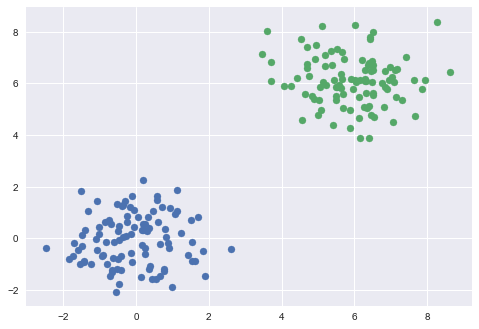

In [8]:
#print(d1.shape[0])

d1 = initialize_weights(0.0,1.0,(100, 2))
d2 = initialize_weights(0.0,1.0,(100, 2))+6
#pattern = np.array([d1, d2])
#print(np.shape(d1))
d1 = np.c_[d1, -1*np.ones(np.shape(d1)[0])]
d2 = np.c_[d2, np.ones(np.shape(d1)[0])]

w = np.array([1,1,1])

plt.scatter(d1[:,0], d1[:,1])
plt.scatter(d2[:,0],d2[:,1])
plt.show()

## Perform classification with a single-layer perceptron and analyze the results

In [9]:
def visualize_classifier(X, y, W): 
    # Define the minimum and maximum values for X and Y 
    # that will be used in the mesh grid 
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01 
 
    # Define the mesh grid of X and Y values 
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    
    # Run the classifier on the mesh grid 
    #output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #print(x_vals)
    hin = np.matmul(np.c_[x_vals.ravel(), y_vals.ravel(), np.ones(np.shape(x_vals.ravel())[0])], W) # Should be W*X not the other way around...
    hout = activation_function(hin)
    output = hout
    
    # Reshape the output array
    output = output.reshape(x_vals.shape)
    
    # Create a plot 
    plt.figure() 
 
    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray) 
 
    # Overlay the training points on the plot  
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # Specify the boundaries of the plot 
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max()) 
 
    # Specify the ticks on the X and Y axes 
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0))) 
    
    plt.show()

## Batch

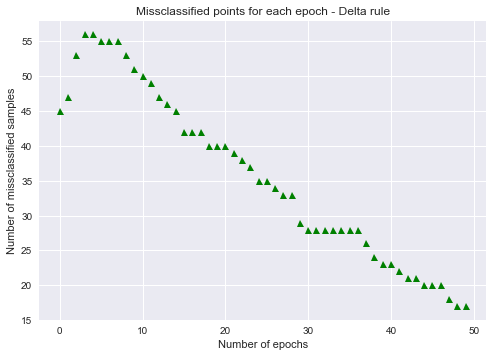

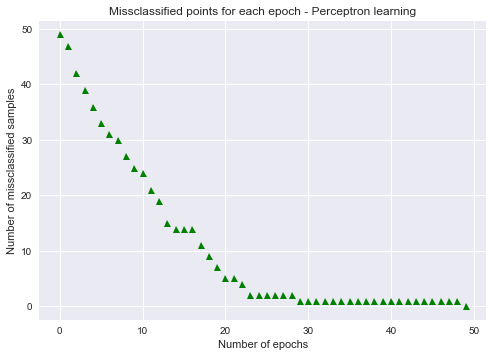

array([ 0.44752526,  0.18114233, -1.11150253])

In [10]:
np.random.seed(seed=2)
data = np.concatenate((d1,d2))
np.random.shuffle(data)

#plt.scatter(d1[:,0], d1[:,1])
#plt.scatter(d2[:,0],d2[:,1])
#plt.show()

# 

# 




# print(cl1)

# sys.exit(0)

def sl_perceptron_learning(pattern_and_target, n_epochs):
    
    np.random.seed(seed=3)
    
    ax1 = np.arange(-4,10,0.01)
    cl1 = clrs.to_rgba('g')
    
    #fig = plt.figure()
    
    eta = 0.001

    target = pattern_and_target[:,2]

    only_pattern = np.column_stack((pattern_and_target[:,0],pattern_and_target[:,1]))
    bias_term = np.ones(only_pattern.shape[0])

    only_pattern = np.column_stack((only_pattern, bias_term))



    w = initialize_weights(0.0,1.0,pattern_and_target.shape[1])
#     print("Initializing with weigths:")
#     print(w)
    
    for i in range(n_epochs):
        

        lst = list(cl1)
        lst[1] = lst[1]*0.99
        cl1 = tuple(lst)
  #      print(cl1)

        wx_sum = np.dot(only_pattern, w)

        y = wx_sum.copy()

        y[y>0] =1
        y[y<0] = -1
        
        
        
        w = w - eta*np.matmul((y-target),only_pattern)
        
        
        #if np.array_equal(y,target):
        #    print("Converged after "+str(i)+ " epochs.")
        #    twod_decision_boundary(w, ax1,0,cl1)
            
            
        #    break
        missclassified(i, np.dot(only_pattern,w),target,2) ##Uncomment to plot missclassified samples
        
        #if i%5 ==0:     
        #    twod_decision_boundary(w, ax1,0,cl1)   ##Uncomment to plot Decision boundary
        
    #visualize_classifier(only_pattern, target,w)   ##Uncomment to visualize cool shaded dec bound    
    plt.title('Missclassified points for each epoch - Perceptron learning')
    
    plt.show()
    return w


def sl_delta_rule(pattern_and_target, n_epochs):
    
    
    eta = 0.0001
    np.random.seed(seed=3)
    ax1 = np.arange(-4,10,0.01)
    cl2 = clrs.to_rgba('r')
    
    
    target = pattern_and_target[:,2]

    only_pattern = np.column_stack((pattern_and_target[:,0],pattern_and_target[:,1]))
    bias_term = np.ones(only_pattern.shape[0])

    only_pattern = np.column_stack((only_pattern, bias_term))
    #print(only_pattern)



    #w = np.transpose(initialize_weights(0.0,1.0,pattern_and_target.shape[1]))
    w = initialize_weights(0.0,1.0,pattern_and_target.shape[1])
#     print("Initializing with weigths:")
#     print(w)
    
    for i in range(n_epochs):
        
        alst = list(cl2)
        alst[0] = alst[0]*0.99
        cl2 = tuple(alst)
        
        
        step1 = w@np.transpose(only_pattern)
        step2 = step1 - np.transpose(target)
        delta_w = -eta*step2@only_pattern
        
        

        w+=delta_w
        
        missclassified(i, np.dot(only_pattern,w),target,2) ##Uncomment to plot missclassified samples
        #if i%5==0:     
        #    twod_decision_boundary(w, ax1,0,cl2)      #Uncomment for decision boundary        
        
        
    #visualize_classifier(only_pattern, target,w)   ##Uncomment to visualize cool shaded dec bound
    
    plt.title('Missclassified points for each epoch - Delta rule')
    plt.show()
    return w




#print()

#print('DELTA RULE - DARKER DECISION BOUNDARY FOR EACH EPOCH')
sl_delta_rule(data,50)
#plt.scatter(d1[:,0], d1[:,1])
#plt.scatter(d2[:,0],d2[:,1])
#print('PERCEPTRON LEARNING - DARKER DECISION BOUNDARY FOR EACH EPOCH')
sl_perceptron_learning(data,50)
#plt.show()













## Sequential


DELTA RULE - DARKER DECISION BOUNDARY FOR EACH EPOCH


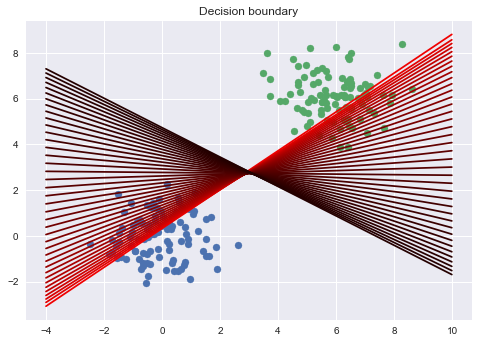

[ 0.12054836  0.18215814 -0.87276261]
PERCEPTRON LEARNING - DARKER DECISION BOUNDARY FOR EACH EPOCH


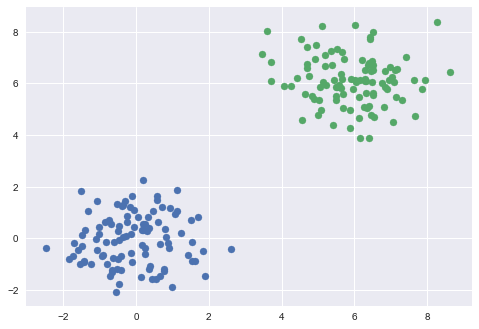

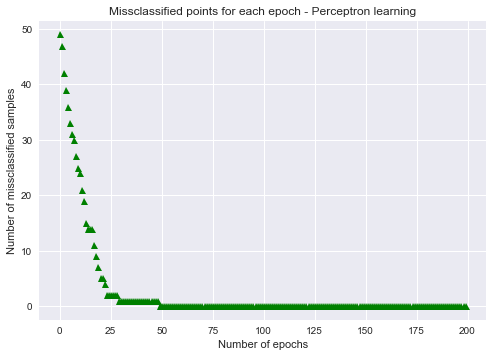

[ 0.44752526  0.18114233 -1.11150253]


In [11]:
data = np.concatenate((d1,d2))
np.random.shuffle(data)

plt.scatter(d1[:,0], d1[:,1])
plt.scatter(d2[:,0],d2[:,1])


def sl_perceptron_learning_seq(pattern_and_target, n_epochs):
    
    ax1 = np.arange(-4,10,0.01)
    cl1 = clrs.to_rgba('g')
    
    #fig = plt.figure()
    
    eta = 0.001

    target = pattern_and_target[:,2]

    only_pattern = np.column_stack((pattern_and_target[:,0],pattern_and_target[:,1]))
    bias_term = np.ones(only_pattern.shape[0])

    only_pattern = np.column_stack((only_pattern, bias_term))



    w = initialize_weights(0.0,0.3,pattern_and_target.shape[1])
    
    for i in range(n_epochs):
        
        lst = list(cl1)
        lst[1] = lst[1]*0.95
        cl1 = tuple(lst)
        
        for point in only_pattern:

        

            wx_sum = np.dot(point, w)
            
            if wx_sum>0:
                y=1
            else:
                y=0
        
        
        
            w = w - eta*np.matmul((y-target),only_pattern)
        
        
        #missclassified(i, y,target,1)    ##Uncomment to plot number of missclassified samples
        
        #color[0][2] +=0.05
        
        if i%2==0 and i!=0:        
            twod_decision_boundary(w, ax1,0,cl1)   ##Uncomment to plot Decision boundary
        
    #visualize_classifier(only_pattern, target,w)   ##Uncomment to visualize cool shaded dec bound
    
    plt.show()
    return w


def sl_delta_rule_seq(pattern_and_target, n_epochs):
    eta = 0.0001
    
    ax1 = np.arange(-4,10,0.01)
    cl2 = clrs.to_rgba('r')
    
    
    target = pattern_and_target[:,2]

    only_pattern = np.column_stack((pattern_and_target[:,0],pattern_and_target[:,1]))
    bias_term = np.ones(only_pattern.shape[0])

    only_pattern = np.column_stack((only_pattern, bias_term))
    #print(only_pattern)



    #w = np.transpose(initialize_weights(0.0,1.0,pattern_and_target.shape[1]))
    w = initialize_weights(0.0,1.0,pattern_and_target.shape[1])
    
    for i in range(n_epochs):
        
        alst = list(cl2)
        alst[0] = alst[0]*0.99
        cl2 = tuple(alst)
#        print(cl2)
        
        #delta_w = -eta*np.dot((activation_function(np.dot(only_pattern,w))-target),only_pattern)
        #delta_w = -eta*np.dot(np.dot(only_pattern,w)-target,only_pattern)
        for p,point in enumerate(only_pattern):
            
            
            
            step1 = w@np.transpose(point)
            step2 = step1 - target[p]
            #bp()
            delta_w = -eta*step2*point
            
            
#        delta_w =-eta*(w*np.transpose(only_pattern) -np.transpose(target))*only_pattern
        

            w+=delta_w
        
        #missclassified(i, np.dot(only_pattern,w),target,2) ##Uncomment to plot missclassified samples
        if i%5==0 and i!=0:        
            twod_decision_boundary(w, ax1,0,cl2)      #Uncomment for decision boundary
        #print(np.dot(only_pattern,w))
        
        
        
    #visualize_classifier(only_pattern, target,w)   ##Uncomment to visualize cool shaded dec bound

    plt.show()
    return w




print()

print('DELTA RULE - DARKER DECISION BOUNDARY FOR EACH EPOCH')
print(sl_delta_rule_seq(data,200))
plt.scatter(d1[:,0], d1[:,1])
plt.scatter(d2[:,0],d2[:,1])
print('PERCEPTRON LEARNING - DARKER DECISION BOUNDARY FOR EACH EPOCH')
print(sl_perceptron_learning(data,200))
#plt.show()


## Classification of samples that are not linearly separable

mu1 = 1.0, mu2 = 6.0, sigma1 = 1.0, sigma2 = 1.0 :-)

DELTA RULE - DARKER DECISION BOUNDARY FOR EACH EPOCH
Initializing with weigths:
[-0.41675785 -0.05626683 -2.1361961 ]


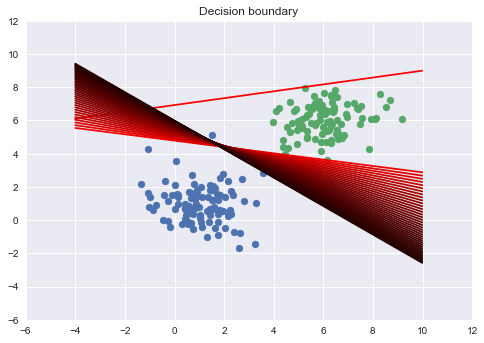

PERCEPTRON LEARNING - DARKER DECISION BOUNDARY FOR EACH EPOCH


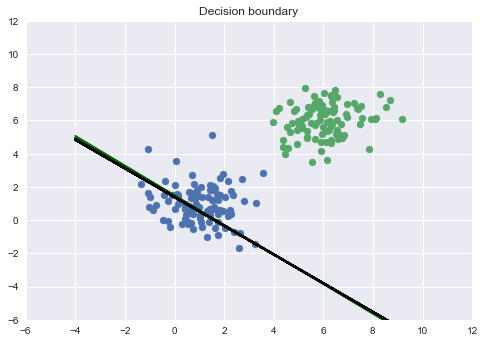

mu1 = 1.0, mu2 = 5.0, sigma1 = 1.0, sigma2 = 1.5 :-)

DELTA RULE - DARKER DECISION BOUNDARY FOR EACH EPOCH
Initializing with weigths:
[-0.41675785 -0.05626683 -2.1361961 ]


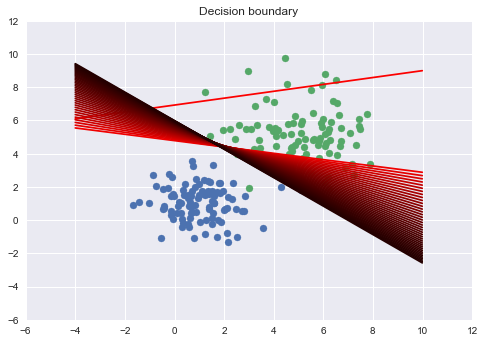

PERCEPTRON LEARNING - DARKER DECISION BOUNDARY FOR EACH EPOCH


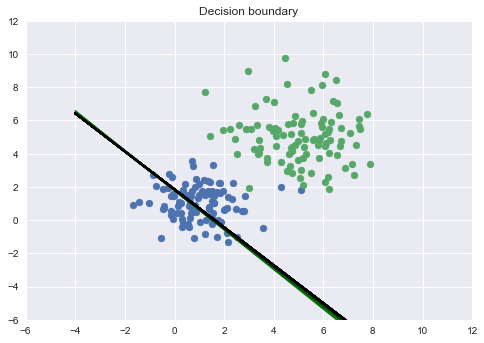

mu1 = 1.0, mu2 = 4.0, sigma1 = 1.0, sigma2 = 2.0 :-)

DELTA RULE - DARKER DECISION BOUNDARY FOR EACH EPOCH
Initializing with weigths:
[-0.41675785 -0.05626683 -2.1361961 ]


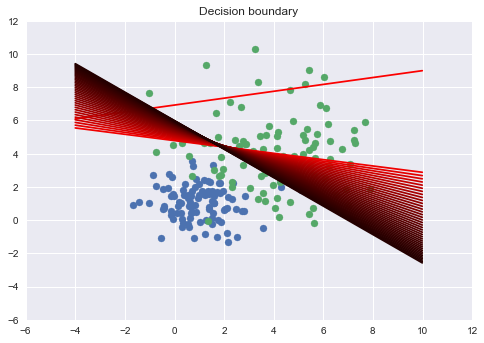

PERCEPTRON LEARNING - DARKER DECISION BOUNDARY FOR EACH EPOCH


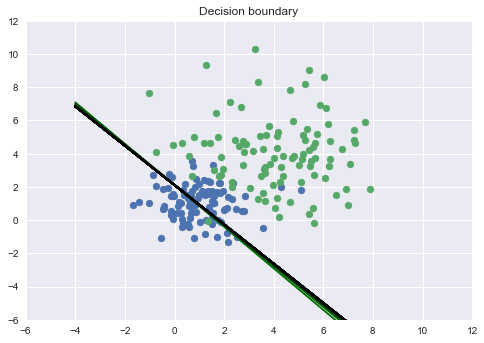

mu1 = 1.0, mu2 = 3.0, sigma1 = 1.0, sigma2 = 2.5 :-)

DELTA RULE - DARKER DECISION BOUNDARY FOR EACH EPOCH
Initializing with weigths:
[-0.41675785 -0.05626683 -2.1361961 ]


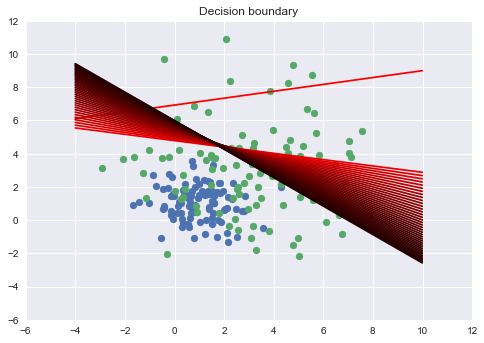

PERCEPTRON LEARNING - DARKER DECISION BOUNDARY FOR EACH EPOCH


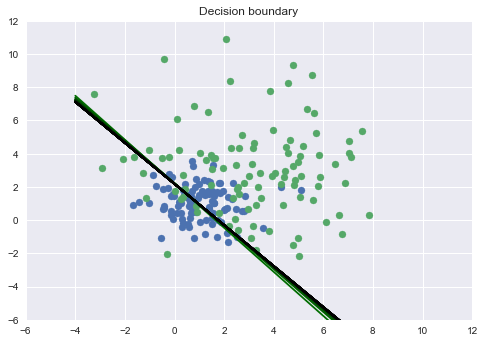

mu1 = 1.0, mu2 = 2.0, sigma1 = 1.0, sigma2 = 3.0 :-)

DELTA RULE - DARKER DECISION BOUNDARY FOR EACH EPOCH
Initializing with weigths:
[-0.41675785 -0.05626683 -2.1361961 ]


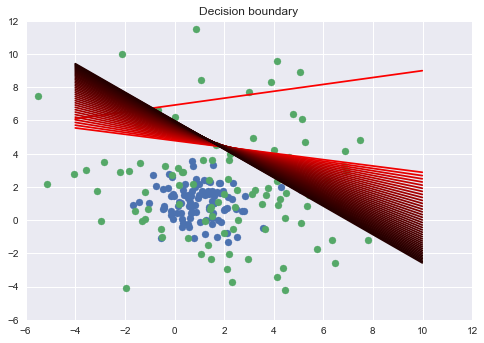

PERCEPTRON LEARNING - DARKER DECISION BOUNDARY FOR EACH EPOCH


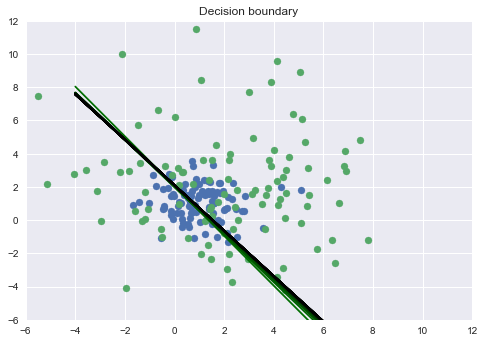

mu1 = 1.0, mu2 = 1.0, sigma1 = 1.0, sigma2 = 3.5 :-)

DELTA RULE - DARKER DECISION BOUNDARY FOR EACH EPOCH
Initializing with weigths:
[-0.41675785 -0.05626683 -2.1361961 ]


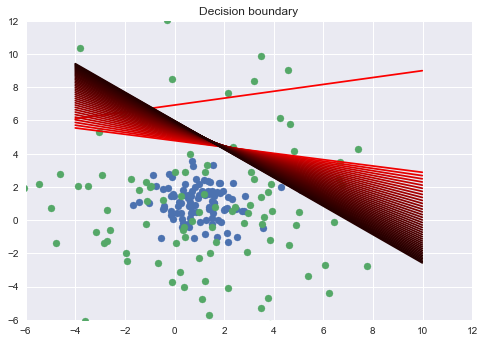

PERCEPTRON LEARNING - DARKER DECISION BOUNDARY FOR EACH EPOCH


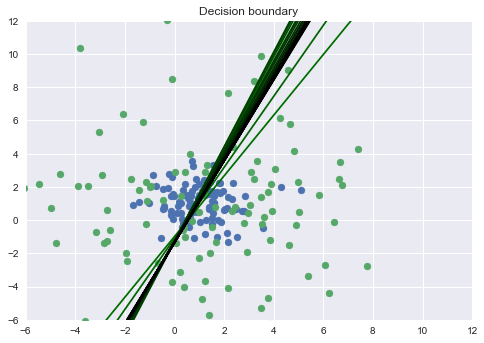

In [12]:
#print(d1.shape[0])

mu1 = 1.0
sigma1 = 1.0
mu2 = 6.0
sigma2 = 1.0

for p in range(6):

    d3 = initialize_weights(mu1,sigma1,(100, 2))
    d4 = initialize_weights(mu2,sigma2,(100, 2))
    #pattern = np.array([d1, d2])
    #print(np.shape(d1))
    d3 = np.c_[d3, np.zeros(np.shape(d3)[0])]
    d4 = np.c_[d4, np.ones(np.shape(d4)[0])]

    plt.scatter(d3[:,0], d3[:,1])
    plt.scatter(d4[:,0],d4[:,1])

    plt.axis([-6, 12, -6, 12])
    
    nls_data = np.concatenate((d3,d4))
    np.random.shuffle(nls_data)
    
    print("mu1 = "+ str(mu1) +", mu2 = "+ str(mu2) + ", sigma1 = "+ str(sigma1) + ", sigma2 = " + str(sigma2)+" :-)")
    print()
    
    print('DELTA RULE - DARKER DECISION BOUNDARY FOR EACH EPOCH')
    plt.axis([-6, 12, -6, 12])
    sl_delta_rule(data,200)
    plt.scatter(d3[:,0], d3[:,1])
    plt.scatter(d4[:,0],d4[:,1])
    plt.axis([-6, 12, -6, 12])
    print('PERCEPTRON LEARNING - DARKER DECISION BOUNDARY FOR EACH EPOCH')
    sl_perceptron_learning_seq(nls_data,100)
    
    mu2 -= 1.0
    sigma2 += 0.5
    
    #plt.show()







# MLP

In [12]:
def phi_prime(phi_eval):
    
    derivative = 0.5*(1+phi_eval)*(1-phi_eval)
    
    return(derivative)

def generatePattern(n,dim,mu1,sigma1,mu2,sigma2):
    d3 = initialize_weights(mu1,sigma1,(n, dim))
    d4 = initialize_weights(mu2,sigma2,(n, dim))

    d3 = np.c_[d3, np.zeros(np.shape(d3)[0])]
    d4 = np.c_[d4, np.ones(np.shape(d4)[0])]
    
    nls_data = np.concatenate((d3,d4))
    np.random.shuffle(nls_data)
    
    return(nls_data)
    
    
    

# Batch

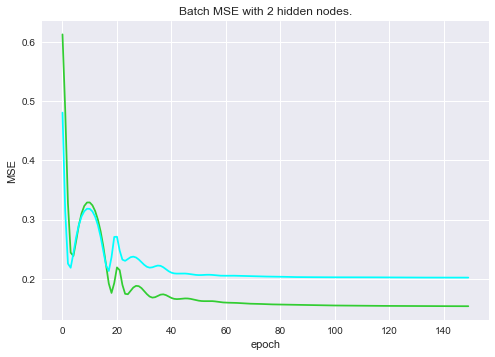

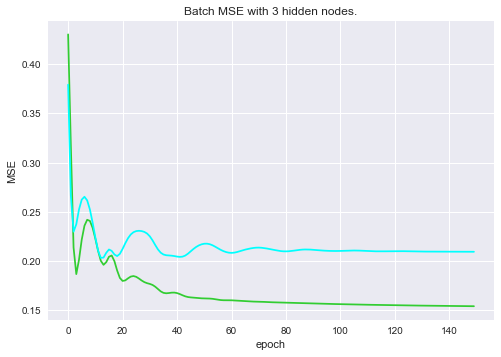

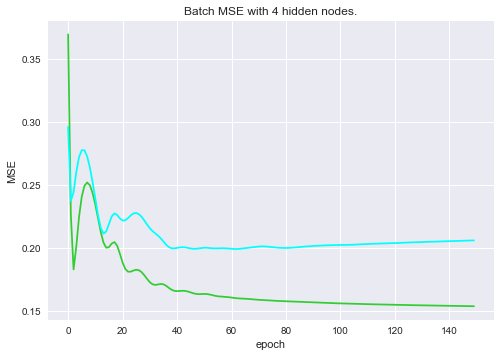

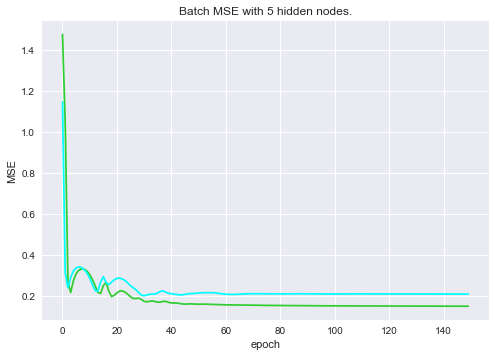

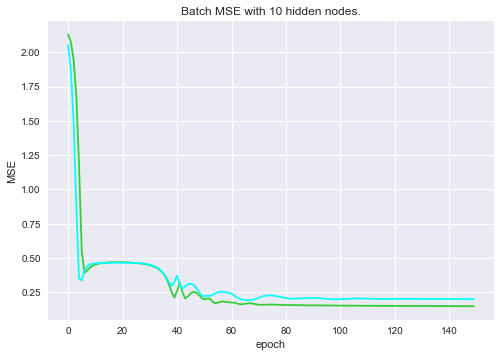

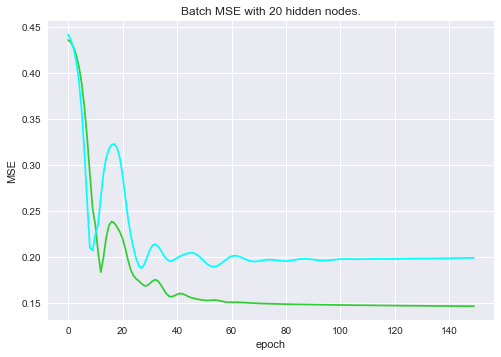

In [13]:
M = 5 #nr hidden nodes
L = 2 #nr of inputs
K = 1 #nr of outputs

points = 100

epochs = 150

pattern_and_target = generatePattern(points,L,1.0,1.1,2.0,1.1)

test_data = generatePattern(50,L,1.0,1.1,2.0,1.1)

#print(training)

def back_propagation(labeled_data,test, M,L,K,epochs, eta=0.03, alpha=0.9,theta=0.0,psi=0.0, visualize_function = False):
    
    test_error=[]
    error=[]
    
    
    
    W = np.random.normal(0.0,1.0,(M,L))

    W = np.column_stack((W,np.ones(M)))

    V = np.random.normal(0.0,1.0,(K,M))
    v = np.vstack((V,np.ones(M)))

    pattern = np.vstack((labeled_data[:,0],labeled_data[:,1]))
    

    more_bias = np.ones(pattern.shape[1])
    
    pattern = np.vstack((pattern,more_bias))
    
    

    
    target = labeled_data[:,2]

#     print("Pattern Dimensions: ")
#     print(pattern.shape)
#     print("Target Dimensions:")
#     print(target.shape)
    
    test_samples = np.vstack((test[:,0],test[:,1]))
    test_samples = np.vstack((test_samples,np.ones(test_samples.shape[1])))
    test_target = test[:,2]
    
    

    for epoch in range(epochs):
        
        #forward
        hin = W@pattern
        hout=activation_function(hin)
        
        oin = V@hout
        out = activation_function(oin)
        

        
        #backward
        delta_o = np.multiply((out - target),phi_prime(out))
        delta_h = np.multiply((np.transpose(V)@delta_o),phi_prime(hout))
        
        
        #weight update
            
        theta = theta*alpha - (delta_h@np.transpose(pattern))*(1-alpha)
        psi = psi*alpha - (delta_o@np.transpose(hout))*(1-alpha)
        mse = (1.0/target.size)*(np.sum(np.square(out - target)))

        
        error.append(mse)
        
        W += eta*theta
        V+=eta*psi
        
        #test
        t_hin = W@test_samples
        t_hout = activation_function(t_hin)
        t_oin = V@t_hout
        t_out = activation_function(t_oin)
        t_mse = (1.0/test_target.size)*(np.sum(np.square(t_out - test_target)))
        test_error.append(t_mse)
        
        if visualize_function and epoch%(np.round(epoch/50))==0:
            vis_func(pattern,out)
        
        
    return W,V,error,test_error


for hidden_nodes in [2,3,4,5,10,20]:
    
    weight,veights,err,t_err = back_propagation(pattern_and_target,test_data, hidden_nodes,L,K,epochs)
        
    plt.plot(np.arange(0,epochs,1),err,'limegreen')
    plt.plot(np.arange(0,epochs,1),t_err,'aqua')
    plt.title("Batch MSE with "+str(hidden_nodes)+" hidden nodes.")
    plt.xlabel("epoch")
    plt.ylabel("MSE")
    plt.show()
    
    
    

# Sequential

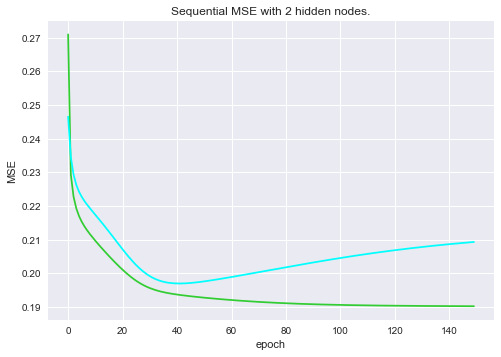

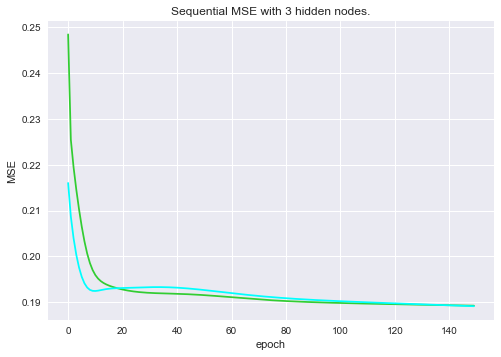

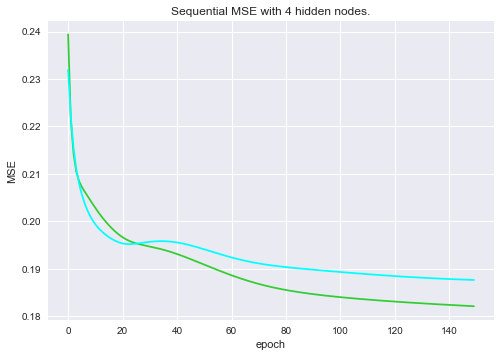

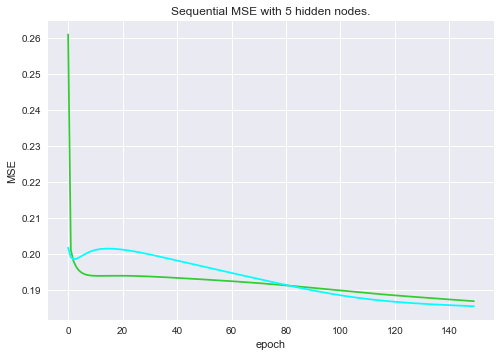

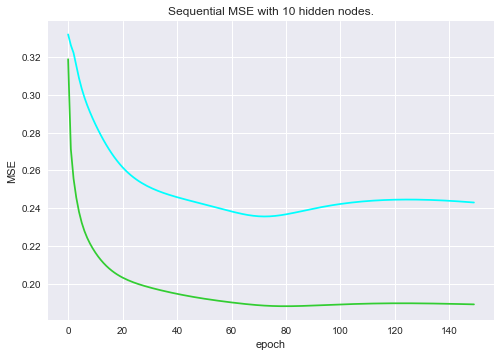

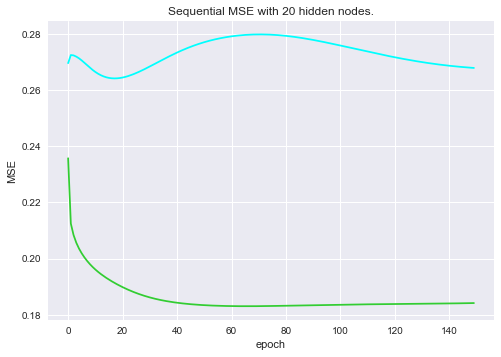

In [14]:
M = 5 #nr hidden nodes
L = 2 #nr of inputs
K = 1 #nr of outputs

points = 100

epochs = 150

pattern_and_target = generatePattern(points,L,1.0,1.1,2.0,1.1)

test_data = generatePattern(50,L,1.0,1.1,2.0,1.1)

#print(training)

def back_propagation_seq(labeled_data,test, M,L,K,epochs, eta=0.03, alpha=0.9,theta=0.0,psi=0.0, visualize_function = False):
    
    test_error=[]
    error=[]
    
    
    
    W = np.random.normal(0.0,1.0,(M,L))

    W = np.column_stack((W,np.ones(M)))

    V = np.random.normal(0.0,1.0,(K,M))
    v = np.vstack((V,np.ones(M)))

    pattern = np.vstack((labeled_data[:,0],labeled_data[:,1]))
    

    more_bias = np.ones(pattern.shape[1])
    
    pattern = np.vstack((pattern,more_bias))
    
    

    
    target = labeled_data[:,2]

#     print("Pattern Dimensions: ")
#     print(pattern.shape)
#     print("Target Dimensions:")
#     print(target.shape)
    
    test_samples = np.vstack((test[:,0],test[:,1]))
    test_samples = np.vstack((test_samples,np.ones(test_samples.shape[1])))
    test_target = test[:,2]
    
    

    for epoch in range(epochs):
        
        mse =0
        for i in range(pattern.shape[1]):
            #forward
            hin = W@pattern[:,i]
            hout=activation_function(hin)

            oin = V@hout
            out = activation_function(oin)



            #backward
            
            delta_o = np.multiply((out - target[i]),phi_prime(out))
            
            delta_h = np.multiply((np.transpose(V)@delta_o),phi_prime(hout))


            #weight update

#             theta = theta*alpha - (delta_h@np.transpose(pattern[:,i]))*(1-alpha)
#             psi = psi*alpha - (delta_o@np.transpose(hout))*(1-alpha)
            
#             W += eta*theta
#             V+=eta*psi            

    
            
            for r in range(W.shape[0]):
                for c in range(W.shape[1]):
                    W[r,c] = W[r,c] - eta*pattern[c,i]*delta_h[r]
                    
            for s in range(V.shape[0]):
                for d in range(V.shape[1]):
                    V[s,d] = V[s,d] - eta*hin[d]*delta_o[s]
            

            
            mse += np.square(out[0]- target[i])
        
        
        error.append(mse/(np.size(target)))
        

        
        #test
        t_mse = 0
        
        for g in range(test_samples.shape[1]):
        
            t_hin = W@test_samples[:,g]
            t_hout = activation_function(t_hin)
            t_oin = V@t_hout
            t_out = activation_function(t_oin)
            t_mse += np.square(t_out[0] - test_target[g])

        test_error.append((1.0/test_target.size)*t_mse)
        
        if visualize_function and epoch%(np.round(epoch/50))==0:
            vis_func(pattern,out)
        
        
    return W,V,error,test_error


for hidden_nodes in [2,3,4,5,10,20]:
    
    weight,veights,err,t_err = back_propagation_seq(pattern_and_target,test_data, hidden_nodes,L,K,epochs)
        
    plt.plot(np.arange(0,epochs,1),err,'limegreen')
    plt.plot(np.arange(0,epochs,1),t_err,'aqua')
    plt.title("Sequential MSE with "+str(hidden_nodes)+" hidden nodes.")
    plt.xlabel("epoch")
    plt.ylabel("MSE")
    plt.show()

In [16]:
def forward_pass(W,V,pattern):
    
    H = activation_function(W@pattern)
    O = activation_function(V@H)
    
    return H,O

In [15]:
def backward_pass(O,H,pattern,target,W,V):
    delta_o = np.multiply((O-target),phi_prime(V@H))
    delta_h = np.multiply((np.transpose(V)@delta_o) ,phi_prime(W@pattern))
    
    delta_h = delta_h[0:M,:]
    
    return(delta_o,delta_h)



# Function Approximation

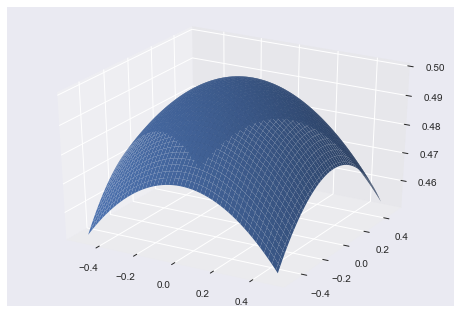

In [18]:
def gendata(interval,visualize=False):

    
    ndata = np.power(interval.size,2)
    
    x=y=interval
    
    x,y = np.meshgrid(x,y)
    
    z = np.exp(-0.1*(np.power(x,2) + np.power(y,2))) -0.5
    
    targets = z.reshape((1, ndata))
    
    patterns = np.vstack((x.reshape((1, ndata)), y.reshape((1, ndata))))
    
    p_and_t = np.vstack((patterns,targets))
        
    if visualize:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(x, y, z)#, facecolors=colors, linewidth=0)
    
    return(p_and_t)


    
    #zz = z.reshape(())

inter1 = np.arange(-0.5,0.5,0.01)
inter2 = np.arange(0.7,0.9,0.05)

f_train = gendata(inter1, True)
f_test = gendata(inter2)



#print("f tr" + str(f_train.shape))

hidden_nodes = 4
L = 2
K = 1
epochs = 100

#back_propagation(np.transpose(f_train),np.transpose(f_test), hidden_nodes,L,K,epochs, visualize_function = True)

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS0


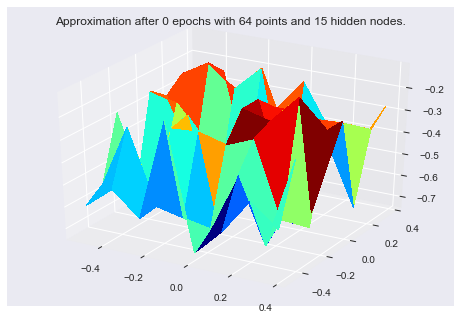

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS20


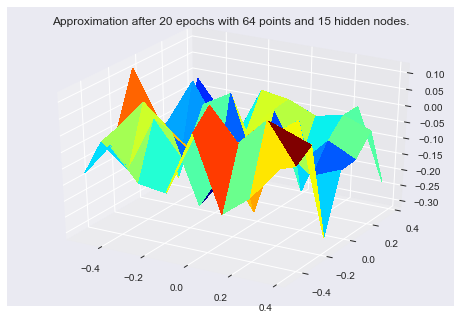

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS40


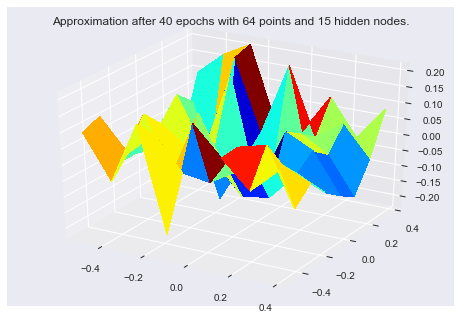

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS60


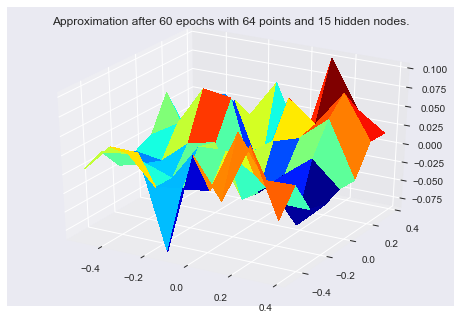

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS80


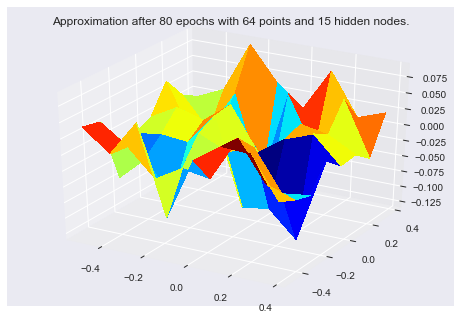

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS100


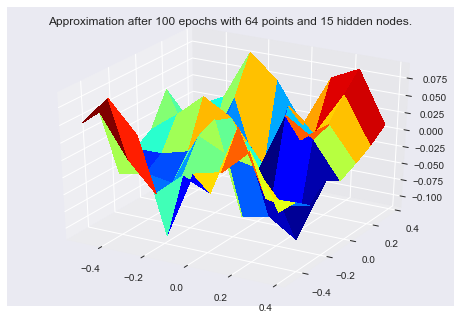

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS120


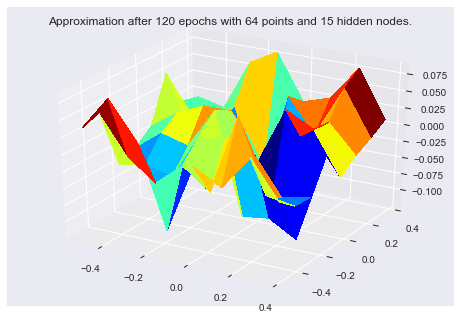

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS140


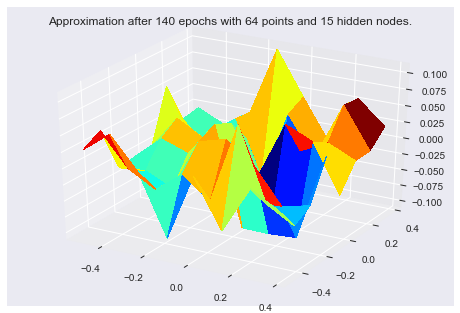

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS160


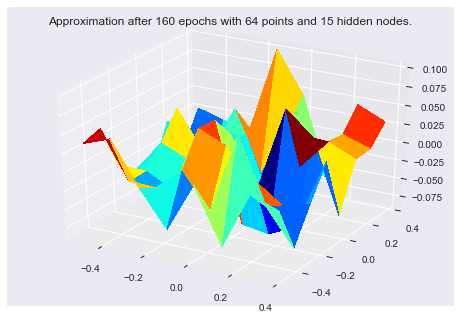

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS180


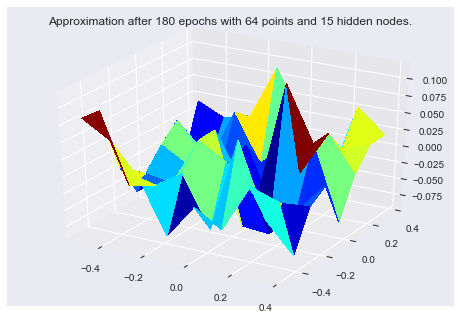

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS200


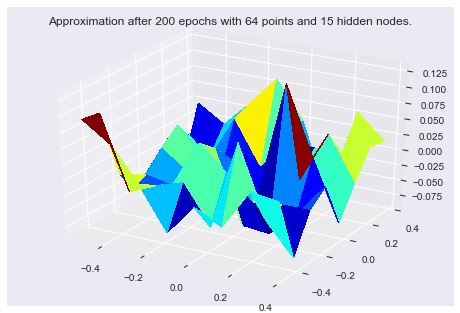

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS220


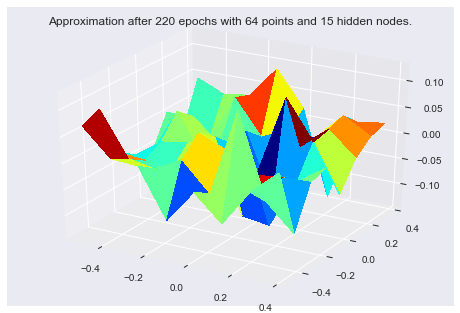

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS240


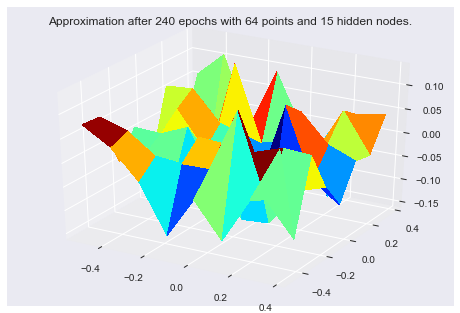

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS260


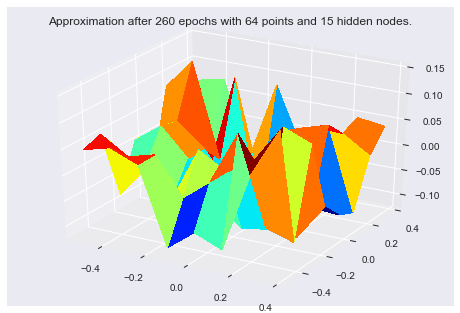

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS280


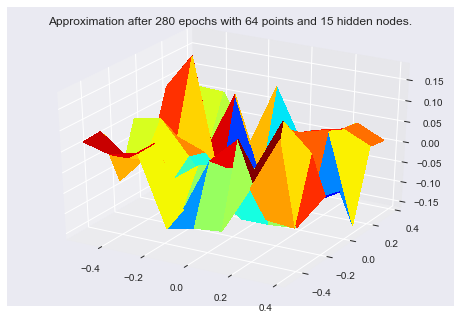

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS300


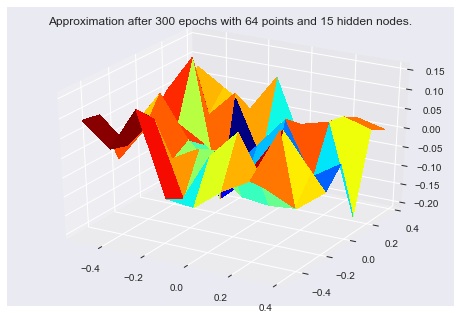

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS320


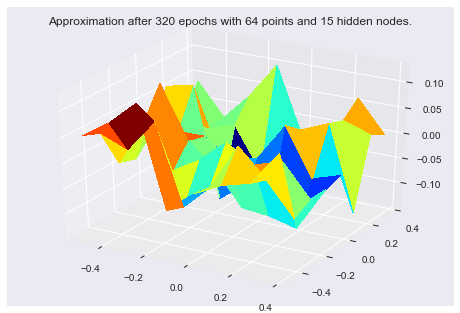

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS340


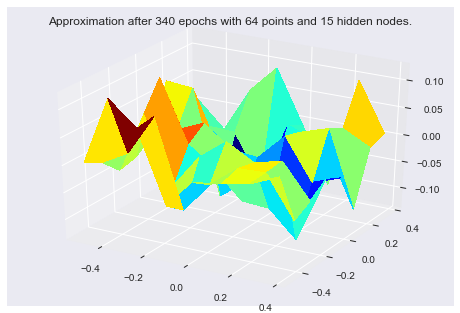

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS360


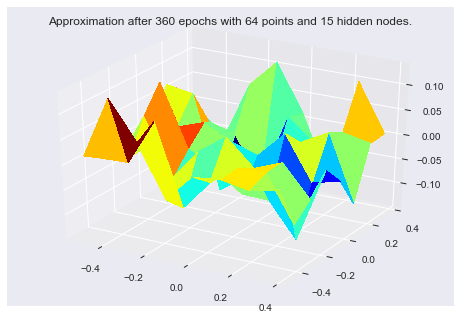

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS380


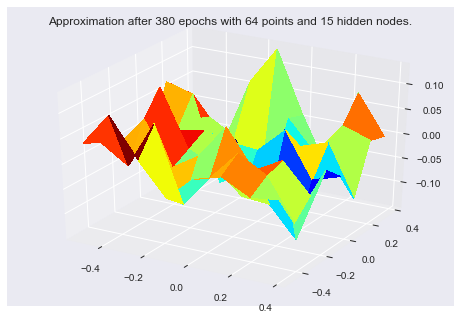

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS400


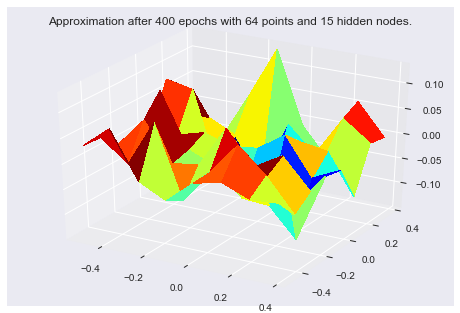

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS420


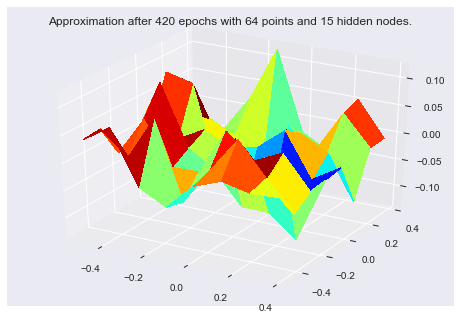

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS440


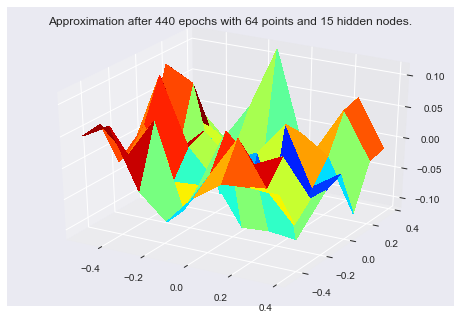

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS460


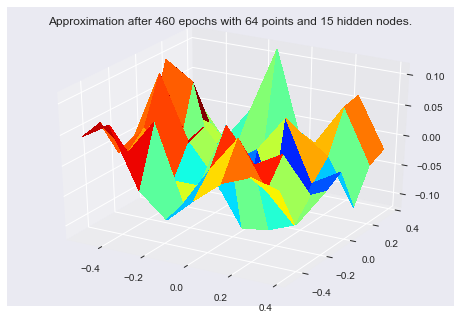

(8, 8)
(8, 8)
(8, 8)
NUMBER OF POINTS64
HIDDEN NODES15
EPOCHS480


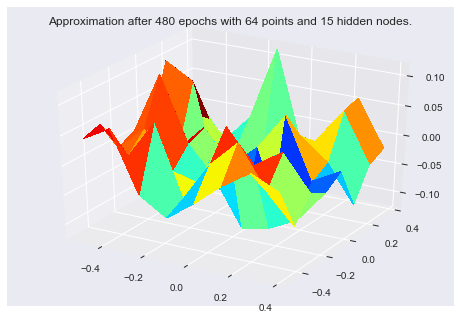

In [16]:
def vis_func(x_and_y, z):
#     print("xy shape")
#     print(x_and_y.shape)
#     print("z shape")
#     print(z.shape)
    
    gridsize = np.sqrt(x_and_y.shape[1]).astype(int)
    
    x=y=0.1*np.arange(-5.0,5.0,10.0/gridsize)
    
    x,y = np.meshgrid(x,y)
    
    Z = z.reshape((gridsize,gridsize))
    
    fig=plt.figure()
    ax = fig.gca(projection = '3d')
    surf = ax.plot_surface(x,y,Z)

x_complete =y_complete= np.transpose(np.arange(-5,5,0.5))


v1= np.exp(-np.multiply(x_complete,0.1*x_complete))-0.5
v2 = np.exp(-np.multiply(y_complete,0.1*y_complete))-0.5

z = np.outer(v1,v2)


ndata = z.shape[0]*z.shape[1]

target = z.reshape((1,ndata))

xx,yy = np.meshgrid(x_complete, y_complete)

u1 = xx.reshape((1,ndata))
u2 = yy.reshape((1,ndata))

pattern = np.concatenate((u1,u2),axis=0)

permute = np.random.permutation(ndata)

x_p = pattern[:,permute]
y_p = target[:,permute]

n = 64
x_p = x_p[:,0:n]
y_p = y_p[:,0:n]

error = []

alpha = 0.9
eta = 0.15
hidden = 15
outp = 1

w = np.random.normal(0.0,0.5,(hidden,x_p.shape[0]+1))
v= np.random.normal(0.0,0.5,(outp,hidden+1))

dw = 0
dv = 0


#2 hidden nodes
#all points
#100 epochs

#5
#25
#300

epochs = 500

for epoch in range(epochs):
    
    #FW
    hin = w @ np.vstack((x_p, np.ones(x_p.shape[1])))
    hout = np.vstack(((activation_function(hin)),np.ones(x_p.shape[1])))
    
    oin = v@hout
    out = activation_function(oin)
    
    
    #BW
    delta_o = np.multiply((out - y_p),phi_prime(out))
    delta_h = np.multiply((np.transpose(v)*delta_o),phi_prime(hout))
    delta_h = delta_h[1:hidden+1,:]
    
    #WU
    
    stackpat = np.vstack((x_p, np.ones(x_p.shape[1])))
    
    d0 = np.multiply(delta_h@np.transpose(stackpat),1-alpha)
    
    dw = np.multiply(dw,alpha) - d0
    
    dv = np.multiply(dv,alpha) - np.multiply((delta_o@np.transpose(hout)),1-alpha)

    w+=eta*dw
    v+=eta*dv
    delta_h = delta_h[1:hidden,:]
    
    if epoch%20 ==0:
        
        gridsize = np.sqrt(n).astype(int)
        Z = out.reshape((gridsize,gridsize))
        
        fig = plt.figure()
        #ax = fig.add_subplot(111, projection='3d')
        ax = fig.gca(projection='3d')

        X,Y = np.meshgrid(np.arange(-0.5,0.5,(1.0/gridsize)),np.arange(-0.5,0.5,(1.0/gridsize)))
        print(Z.shape)
        print(X.shape)
        print(Y.shape)

        # Plot a basic wireframe.
        #ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
        print("NUMBER OF POINTS"+str(n))
        print("HIDDEN NODES"+str(hidden))
        print("EPOCHS" + str(epoch))
        surf = ax.plot_surface(X, Y, Z, cmap=cm.jet,
                       linewidth=0, antialiased=False)
        plt.title("Approximation after "+str(epoch)+ " epochs with " +str(n)+" points and "+str(hidden)+" hidden nodes." )
        plt.show()
        
        
        #surf = ax.plot_surface(x_p[0,:], x_p[1,:], z)#, facecolors=colors, linewidth=0)
    
    
    #error.append(np.sum(np.power(y_p-out),2))/np.sum(np.power(y_p,2))
    

In [20]:
x = y = np.arange(1,3)
print(np.outer(np.transpose(y),x))
print(np.matmul(x,np.transpose(y)))

[[1 2]
 [2 4]]
5


# Questions so far
* In 2.3.1 it implies that a node consists of several layers?
* In 2.3.1 what is V? Eta?
    * It is a second set of weights?
* In 2.3.1 why has both hin and hout an added ones?
* Why are they using patterns etc. instead of normal notation.